In [4]:
home = "/mnt"

path_LMS = f"{home}/data/Predict-Forclosure/Foreclosure-Prediction-Dataset/LMS_31JAN2019.csv"
path_RMS_Final = f"{home}/data/Predict-Forclosure/Foreclosure-Prediction-Dataset/RF_Final_Data.csv"
path_Customer = f"{home}/data/Predict-Forclosure/Foreclosure-Prediction-Dataset/Customers_31JAN2019.csv"

In [6]:
df_lms = spark\
.read\
.option("inferSchema", "true")\
.option("header", "true")\
.csv(path_LMS)
df_lms

DataFrame[AGREEMENTID: int, CUSTOMERID: string, LOAN_AMT: string, NET_DISBURSED_AMT: string, INTEREST_START_DATE: string, CURRENT_ROI: double, ORIGNAL_ROI: double, CURRENT_TENOR: int, ORIGNAL_TENOR: int, DUEDAY: int, AUTHORIZATIONDATE: string, CITY: string, PRE_EMI_DUEAMT: double, PRE_EMI_RECEIVED_AMT: double, PRE_EMI_OS_AMOUNT: double, EMI_DUEAMT: double, EMI_RECEIVED_AMT: double, EMI_OS_AMOUNT: double, EXCESS_AVAILABLE: double, EXCESS_ADJUSTED_AMT: double, BALANCE_EXCESS: double, NET_RECEIVABLE: double, OUTSTANDING_PRINCIPAL: double, PAID_PRINCIPAL: double, PAID_INTEREST: double, MONTHOPENING: double, LAST_RECEIPT_DATE: string, LAST_RECEIPT_AMOUNT: double, NET_LTV: double, COMPLETED_TENURE: int, BALANCE_TENURE: int, DPD: int, FOIR: double, PRODUCT: string, SCHEMEID: string, NPA_IN_LAST_MONTH: string, NPA_IN_CURRENT_MONTH: string, MOB: int]

In [7]:
df_RMS_Final = spark\
.read\
.option("inferSchema", "true")\
.option("header", "true")\
.csv(path_RMS_Final)
df_RMS_Final

DataFrame[TicketId: string, Type: string, SubType: string, Status: string, Date: string, Preprocessed_EmailBody: string, Preprocessed_Subject: string, Masked_CustomerID: string, Masked_AgreementID: string]

In [9]:
df_Customer = spark\
.read\
.option("inferSchema", "true")\
.option("header", "true")\
.csv(path_Customer)
df_Customer

DataFrame[CUSTOMERID: int, CUST_CONSTTYPE_ID: int, CUST_CATEGORYID: int, PROFESSION: string, AGE: int, SEX: string, MARITAL_STATUS: string, QUALIFICATION: string, NO_OF_DEPENDENT: int, OCCUPATION: string, POSITION: string, GROSS_INCOME: double, PRE_JOBYEARS: int, NETTAKEHOMEINCOME: double, BRANCH_PINCODE: string]

In [10]:
df_Customer.limit(10).toPandas()

,CUSTOMERID,CUST_CONSTTYPE_ID,CUST_CATEGORYID,PROFESSION,AGE,SEX,MARITAL_STATUS,QUALIFICATION,NO_OF_DEPENDENT,OCCUPATION,POSITION,GROSS_INCOME,PRE_JOBYEARS,NETTAKEHOMEINCOME,BRANCH_PINCODE
0,12001000,1,5,None,33,M,M,POSTGRAD,0,None,None,198375.22180,8.0,198375.22180,400070
1,12001001,1,5,None,44,M,M,POSTGRAD,0,None,None,242703.98290,10.0,242703.98290,400070
2,12001002,1,7,None,50,M,M,GRAD,0,None,None,0.00000,NaN,0.00000,400070
3,12001003,3,4,None,40,M,M,GRAD,0,None,None,365263.51160,NaN,365263.51610,400070
4,12001004,3,4,None,27,M,M,GRAD,0,None,None,187342.19900,NaN,187342.19900,400070
5,12001005,3,4,None,43,M,M,GRAD,0,None,None,53536.20823,NaN,53536.20823,400070
6,12001006,3,4,None,48,M,M,UG,0,None,None,49842.14981,NaN,49842.14530,400070
7,12001007,1,5,None,33,M,M,POSTGRAD,0,None,AVP,123370.48370,7.0,123370.48370,400070
8,12001008,1,4,None,44,M,M,GRAD,0,None,None,183331.98270,NaN,183331.98720,400070
9,12001009,3,4,None,37,M,M,UG,0,None,None,93803.84407,NaN,93803.83957,400070


In [11]:
df_RMS_Final.limit(10).toPandas()

,TicketId,Type,SubType,Status,Date,Preprocessed_EmailBody,Preprocessed_Subject,Masked_CustomerID,Masked_AgreementID
0,571910,REQUEST,PROVISIONAL IT CERTIFICATE,Close,2019-01-23 16:34:00,"hi team, can you please provide me itcertifica...",loan account number - loannumber,12020736,0
1,572747,REQUEST,SOA,Close,2019-01-24 16:05:00,hi team can you please arrange the certificate...,certificate of interest and principal for home...,12019080,0
2,4622,General,Others,Close,2016-02-12 13:40:00,None,re: repaysch : loan number loannumber,12004815,0
3,4674,REQUEST,SOA,Close,2016-02-12 15:41:00,"dear sir, you for your promptreply, please not...",re: finalit : loan number loannumber,12005158,11230237
4,4681,QUERY,CHANGEOFROI,Close,2016-02-12 15:55:00,"dear sachin, for your mail. this seems a great...",None,None,None
5,on wed,feb 99,9999 at 9:99 pm,homeservice < EmailID > wrote:,None,None,None,None,None
6,dear customer,",re: fw: repaysch : loan number loannumber,120...",None,None,None,None,None,None,None
7,4736,QUERY,TDSREIMBRELATED,Close,2016-02-12 18:00:00,"sir / madam, we have already send tds certific...",re: process for tds refund,12005516,0
8,4779,REQUEST,FORECLOSURE,Close,2016-02-12 19:36:00,sent from samsung mobile,None,12004239,0
9,5201,REQUEST,REPAYMENT SCHEDULE,Close,2016-02-13 12:40:00,loannumber,None,None,None


In [12]:
df_lms.limit(10).toPandas()

,AGREEMENTID,CUSTOMERID,LOAN_AMT,NET_DISBURSED_AMT,INTEREST_START_DATE,CURRENT_ROI,ORIGNAL_ROI,CURRENT_TENOR,ORIGNAL_TENOR,DUEDAY,...,NET_LTV,COMPLETED_TENURE,BALANCE_TENURE,DPD,FOIR,PRODUCT,SCHEMEID,NPA_IN_LAST_MONTH,NPA_IN_CURRENT_MONTH,MOB
0,11220001,12001000,"1,17,10,107.24","1,17,10,107.24",30-Aug-10,13.7,10.6,58,120,1,...,40.06,39,19,0,0.6000,HL,10901100,None,None,39
1,11220002,12001001,"1,92,90,253.32","1,92,90,253.32",15-Sep-10,13.7,10.6,137,180,1,...,84.31,38,99,0,0.6000,HL,10901100,None,None,38
2,11220003,12001002,"40,53,498.66","40,53,498.66",06-Sep-10,17.2,12.5,360,180,5,...,79.34,38,322,0,0.9100,HL,10901101,None,None,38
3,11220004,12001003,"1,32,57,031.92","1,32,57,031.92",29-Sep-10,15.6,10.9,198,180,5,...,86.86,37,161,0,0.9686,HL,10901101,None,None,38
4,11220005,12001004,"1,32,11,403.04","1,32,11,403.04",06-Sep-10,16.5,11.9,142,180,5,...,40.93,38,104,0,0.7300,HL,10901101,None,None,38
5,11220006,12001005,"39,33,395.00","39,33,395.00",01-Nov-10,16.2,11.5,359,180,5,...,50.89,36,323,0,0.7200,HL,10901101,None,None,36
6,11220007,12001006,"61,55,312.78","61,55,312.78",11-Oct-10,16.5,12.5,262,180,5,...,45.32,28,234,0,1.2300,HL,10901101,None,None,37
7,11220008,12001007,"1,00,22,587.71","1,00,22,587.71",06-Oct-10,13.7,10.6,194,180,1,...,84.63,37,157,0,0.6000,HL,10901100,None,None,37
8,11220009,12001008,"94,99,284.03","94,99,284.03",10-Nov-10,18.9,13.6,287,180,5,...,52.34,34,253,25,0.6100,LAP,10901109,None,None,36
9,11220010,12001009,"77,55,937.31","77,55,937.31",26-Oct-10,15.6,10.9,341,180,5,...,30.94,36,305,0,0.8300,HL,10901101,None,None,37


In [13]:
df_lms = df_lms.repartition(6)

In [14]:
df_lms.limit(10).toPandas()

,AGREEMENTID,CUSTOMERID,LOAN_AMT,NET_DISBURSED_AMT,INTEREST_START_DATE,CURRENT_ROI,ORIGNAL_ROI,CURRENT_TENOR,ORIGNAL_TENOR,DUEDAY,...,NET_LTV,COMPLETED_TENURE,BALANCE_TENURE,DPD,FOIR,PRODUCT,SCHEMEID,NPA_IN_LAST_MONTH,NPA_IN_CURRENT_MONTH,MOB
0,11225934,12006933,"62,90,869.28","62,90,869.28",10-Mar-15,15.6,15.6,180,180,15,...,9.15,22,158,0,0.67,LAP,10901113,None,None,22
1,11227275,12008274,"22,14,411.31","22,14,411.31",08-Sep-15,20.0,20.0,120,120,5,...,39.73,4,116,0,0.49,STLAP,10901154,None,None,5
2,11230117,12011116,"7,50,647.90","7,50,647.90",30-Jun-16,13.7,13.7,181,180,5,...,55.56,11,170,0,0.34,STHL,10901298,0,0,15
3,11226150,12007149,"7,65,660.86","7,65,660.86",03-Jul-15,17.5,17.5,181,180,5,...,42.02,21,160,0,0.26,STHL,10901112,None,None,25
4,11222882,12003881,"29,07,909.38","29,07,909.38",23-Dec-13,13.4,13.4,180,180,5,...,10.15,6,174,0,1.01,HL,10901104,None,None,7
5,11228992,12009991,"77,35,103.83","77,35,103.83",31-Mar-16,14.7,14.7,180,180,5,...,27.93,7,173,0,0.74,LAP,10901261,None,None,8
6,11222847,12003846,"21,01,814.12","21,01,814.12",20-Nov-13,17.5,17.5,180,180,15,...,65.00,36,144,535,0.31,STHL,10901112,None,None,38
7,11223289,12004288,"23,34,514.97","23,34,514.97",24-Feb-14,15.6,15.6,180,180,5,...,30.63,6,174,0,0.53,LAP,10901113,None,None,7
8,11233969,12014968,"24,80,140.66","24,80,140.66",30-Apr-17,13.4,13.4,240,240,5,...,79.97,0,240,0,0.57,STHL,10901265,None,None,1
9,11227922,12008921,"20,98,852.06","20,98,852.06",26-Nov-15,15.9,15.9,144,144,5,...,41.74,21,123,0,0.60,LAP,10901222,0,0,22


In [15]:
print(df_lms.columns)

['AGREEMENTID', 'CUSTOMERID', 'LOAN_AMT', 'NET_DISBURSED_AMT', 'INTEREST_START_DATE', 'CURRENT_ROI', 'ORIGNAL_ROI', 'CURRENT_TENOR', 'ORIGNAL_TENOR', 'DUEDAY', 'AUTHORIZATIONDATE', 'CITY', 'PRE_EMI_DUEAMT', 'PRE_EMI_RECEIVED_AMT', 'PRE_EMI_OS_AMOUNT', 'EMI_DUEAMT', 'EMI_RECEIVED_AMT', 'EMI_OS_AMOUNT', 'EXCESS_AVAILABLE', 'EXCESS_ADJUSTED_AMT', 'BALANCE_EXCESS', 'NET_RECEIVABLE', 'OUTSTANDING_PRINCIPAL', 'PAID_PRINCIPAL', 'PAID_INTEREST', 'MONTHOPENING', 'LAST_RECEIPT_DATE', 'LAST_RECEIPT_AMOUNT', 'NET_LTV', 'COMPLETED_TENURE', 'BALANCE_TENURE', 'DPD', 'FOIR', 'PRODUCT', 'SCHEMEID', 'NPA_IN_LAST_MONTH', 'NPA_IN_CURRENT_MONTH', 'MOB']


In [16]:
print(df_Customer.columns)

['CUSTOMERID', 'CUST_CONSTTYPE_ID', 'CUST_CATEGORYID', 'PROFESSION', 'AGE', 'SEX', 'MARITAL_STATUS', 'QUALIFICATION', 'NO_OF_DEPENDENT', 'OCCUPATION', 'POSITION', 'GROSS_INCOME', 'PRE_JOBYEARS', 'NETTAKEHOMEINCOME', 'BRANCH_PINCODE']


In [17]:
print(df_RMS_Final)

DataFrame[TicketId: string, Type: string, SubType: string, Status: string, Date: string, Preprocessed_EmailBody: string, Preprocessed_Subject: string, Masked_CustomerID: string, Masked_AgreementID: string]


In [18]:
df_lms_join=df_lms.alias("df_lms"). \
    join(df_Customer.alias("df_Customer"), df_lms.CUSTOMERID == df_Customer.CUSTOMERID). \
    select("df_lms.CUSTOMERID","df_Customer.SEX","df_Customer.MARITAL_STATUS","df_Customer.GROSS_INCOME","df_Customer.PRE_JOBYEARS")

In [19]:
df_lms_join.limit(10).toPandas()

,CUSTOMERID,SEX,MARITAL_STATUS,GROSS_INCOME,PRE_JOBYEARS
0,12013694,M,S,23906.63432,None
1,12003352,M,M,80433.67900,None
2,12003352,M,M,80433.67900,None
3,12003352,M,M,80433.67900,None
4,12003352,M,M,80433.67900,None
5,12003352,M,M,80433.67900,None
6,12005965,M,S,48701.28510,None
7,12005965,M,S,48701.28510,None
8,12005965,M,S,48701.28510,None
9,12005965,M,S,48701.28510,None


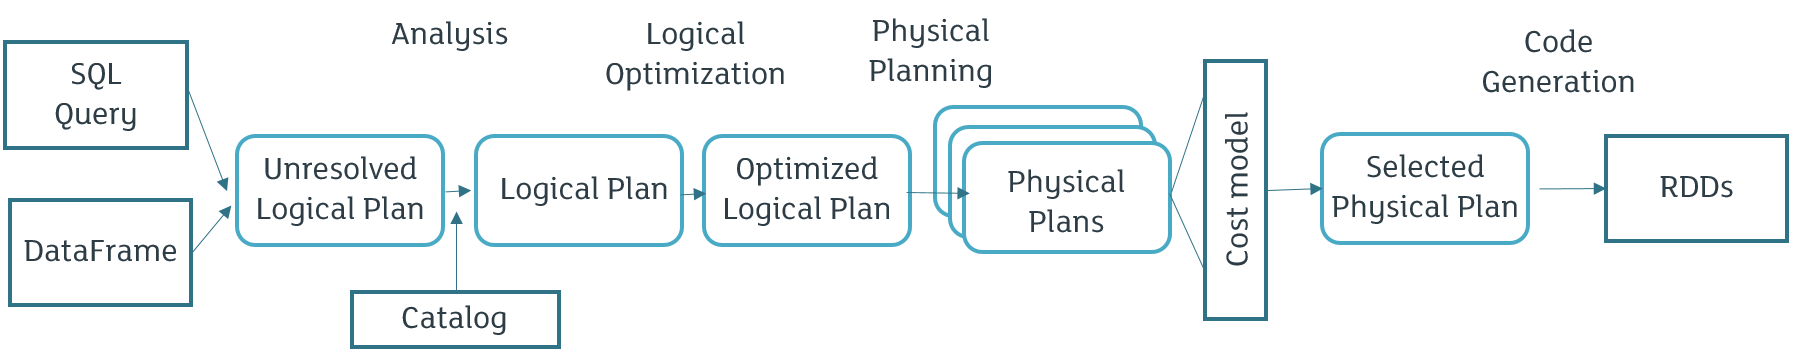

### What is Spark Logical Plan?
- Logical Plan refers to an abstract of all transformation steps that need to be executed
- However, it does not provide details about the Driver(Master Node) or Executor (Workder Node)
- This helps us to achieve the most optimized version from the user expression.
- The Logical Plan is divided into three parts:
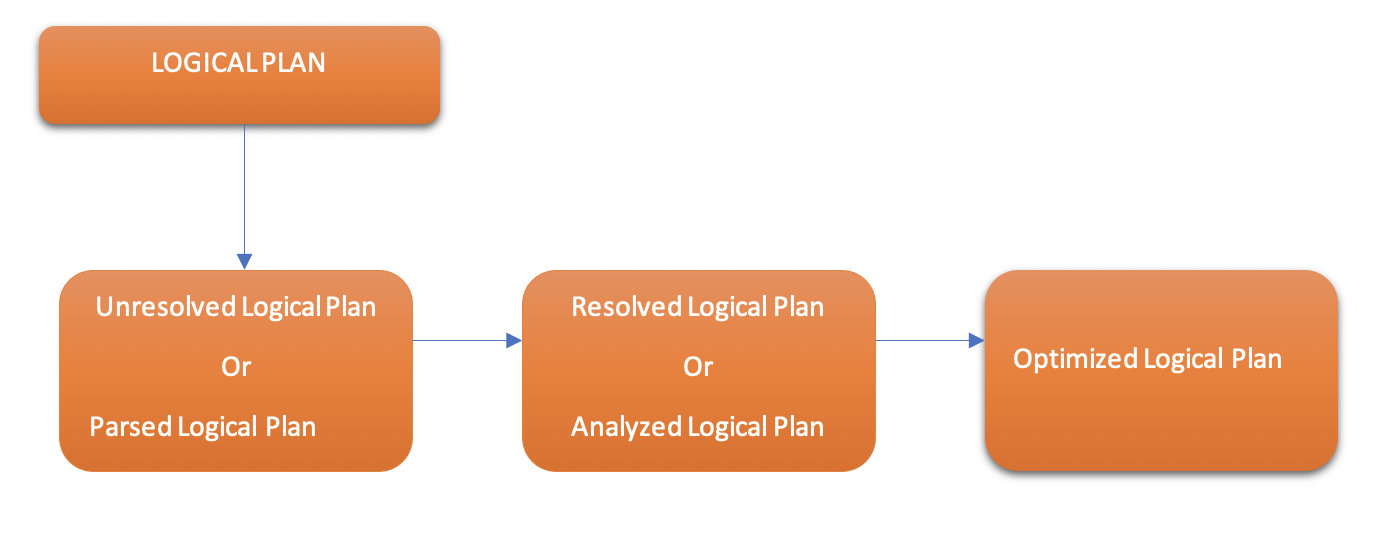

- We should run the ‘explain’ command with a true argument to see both physical and logical plans

### Merge Filters
- Spark performs optimization by itself in the optimized logical plan
- It can figure out that there is no requirement for two filters
- Instead, it completes execution in one filter because the same task can be done by using just one filter through the 'and' operator

### First part: Unresolved/Parsed Logical plan generation

- The first step contributes to the generation of an Unresolved Logical Plan.
- We call it an Unresolved Logical Plan because the column or table names may be inaccurate or may not even exist even when we have a valid code and correct syntax
- This plan is generated post verifying that everything is correct on the syntactic field
- Next, the first version of a logical plan is produced where the relation name and columns are not specifically resolved after the semantic analysis is executed

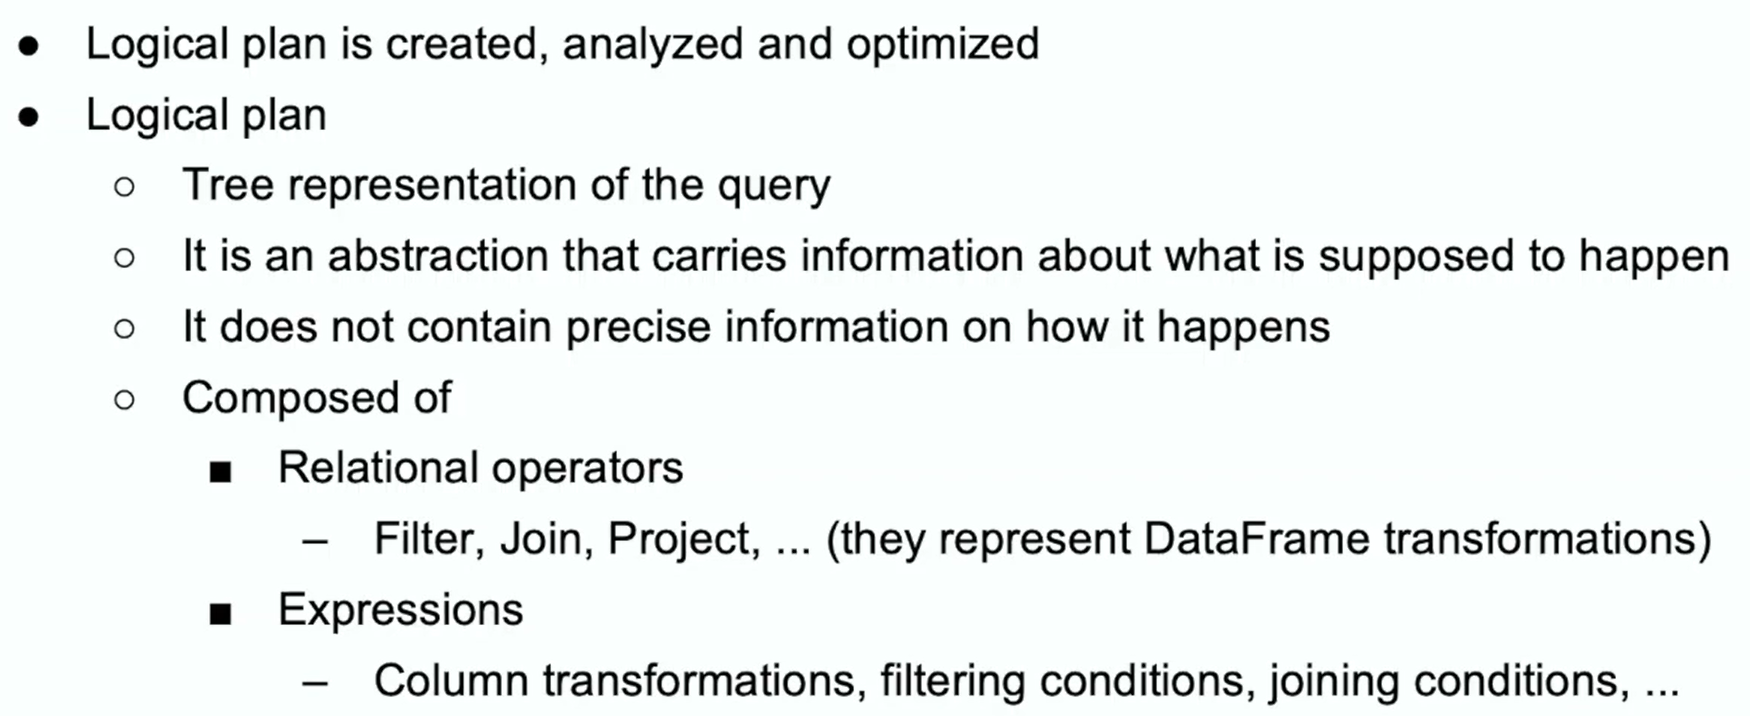

### Second part: Resolved/Analyzed Logical plan generation
- After the generation of an unresolved plan, it will resolve everything that is unresolved yet by accessing an internal Spark structure mentioned as “Catalog” in the previous schema.
- “Catalog” is a repository of Spark table, DataFrame and DataSet. The data from meta-store is pulled into an internal storage component of Spark (also know as Catalog).
- “Analyzer” helps us to resolve/verify the semantics, column name, table name by cross-checking with the Catalog
- The analyzer can reject the Unresolved Logical Plan when it is not able to resolve them (column name, table name, etc.). It creates a Resolved Logical Plan if it is able to resolve them.
- Upon successful completion of everything, the plan is marked as “Analyzed Logical Plan”

### Third part: Optimized logical Plan:
- The Resolved Logical plan will be passed on to a “Catalyst Optimizer” after it is generated
- Catalyst Optimizer will try to optimize the plan after applying its own rule. Basically, the Catalyst Optimizer is responsible to perform logical optimization. For example,
    - It checks all the tasks which can be performed and computed together in one Stage.
    - It decides the order of execution of queries for better performance in the case of a multi-join query.
    - It tries to optimize the query by evaluating the filter clause before any project.

### What is a Spark Physical Plan?
- Physical Plan is an internal enhancement or optimization for Spark
- Suppose, there’s a join query between two tables
- In that join operation, one of them is a large table and the other one is a small table with a different number of partitions scattered in different nodes across the cluster
- Spark decides which partitions should be joined at the start (order of joining), the type of join, etc. for better optimization.
- Physical Plan is limited to Spark operation and for this, it will do an evaluation of multiple physical plans and finalize the suitable optimal physical plan. And ultimately, the finest Physical Plan runs.
- Once the finest Physical Plan is selected, executable code (DAG of RDDs) for the query is created which needs to be executed in a distributed manner on the cluster.

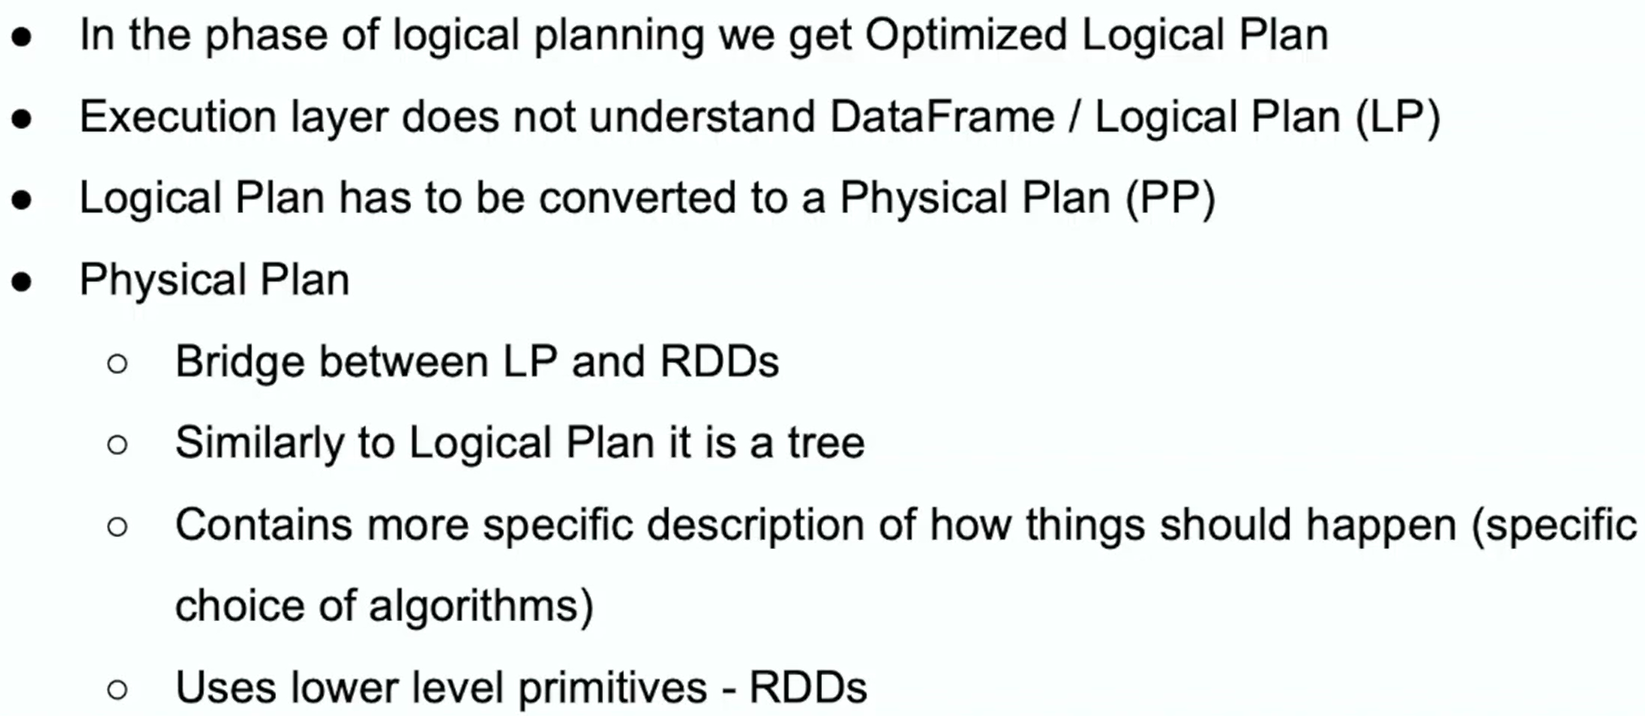

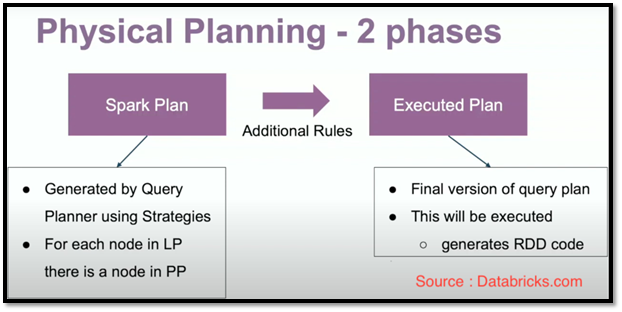

### Physical plan is:
- A bridge between Logical Plans and RDDs
- It is a tree
- Contains more specific description of how things (execution) should happen (specific choice of algorithm)

### Cost Model
- Catalyst Optimizer in Spark generates different kinds of execution strategies/plans and then compare them with “Cost Model”.
- “Cost Model” estimates the execution time and resources required by each strategy/plan
- Finally, whichever strategy/plan is going to be the best optimal one is selected as the “Best Physical Plan”.

### How Apache Spark builds a DAG and Physical Execution Plan ?
- User submits a spark application to the Apache Spark.
- Driver is the module that takes in the application from Spark side.
- Driver identifies transformations and actions present in the spark application. These identifications are the tasks.
- Based on the flow of program, these tasks are arranged in a graph like structure with directed flow of execution from task to task forming no loops in the graph (also called DAG). DAG is pure logical.
- This logical DAG is converted to Physical Execution Plan. Physical Execution Plan contains stages.
- Some of the subsequent tasks in DAG could be combined together in a single stage. Based on the nature of transformations, 
- Driver sets stage boundaries
- There are two transformations, namely narrow transformations and wide transformations
- Narrow transformations : Transformations like Map and Filter that does not require the data to be shuffled across the partitions
- Wide transformations : Transformations like ReduceByKey that does require the data to be shuffled across the partitions. 
- Transformation that requires data shuffling between partitions, i.e., a wide transformation results in stage boundary.
- DAG Scheduler creates a Physical Execution Plan from the logical DAG. Physical Execution Plan contains tasks and are bundled to be sent to nodes of cluster.

## How to generate execution plans

### First Option

In [35]:
df_lms_join.explain(True)

== Parsed Logical Plan ==
'Project [unresolvedalias('df_lms.CUSTOMERID, None), unresolvedalias('df_Customer.SEX, None), unresolvedalias('df_Customer.MARITAL_STATUS, None), unresolvedalias('df_Customer.GROSS_INCOME, None), unresolvedalias('df_Customer.PRE_JOBYEARS, None)]
+- Join Inner, (cast(CUSTOMERID#11 as int) = CUSTOMERID#124)
   :- SubqueryAlias `df_lms`
   :  +- Repartition 6, true
   :     +- Repartition 6, true
   :        +- Relation[AGREEMENTID#10,CUSTOMERID#11,LOAN_AMT#12,NET_DISBURSED_AMT#13,INTEREST_START_DATE#14,CURRENT_ROI#15,ORIGNAL_ROI#16,CURRENT_TENOR#17,ORIGNAL_TENOR#18,DUEDAY#19,AUTHORIZATIONDATE#20,CITY#21,PRE_EMI_DUEAMT#22,PRE_EMI_RECEIVED_AMT#23,PRE_EMI_OS_AMOUNT#24,EMI_DUEAMT#25,EMI_RECEIVED_AMT#26,EMI_OS_AMOUNT#27,EXCESS_AVAILABLE#28,EXCESS_ADJUSTED_AMT#29,BALANCE_EXCESS#30,NET_RECEIVABLE#31,OUTSTANDING_PRINCIPAL#32,PAID_PRINCIPAL#33,... 14 more fields] csv
   +- SubqueryAlias `df_Customer`
      +- Relation[CUSTOMERID#124,CUST_CONSTTYPE_ID#125,CUST_CATEGORYID#

### Second Option
- The second option to see the plan is going to the SQL tab in Spark UI where are lists of all running and finished queries
- By clicking on your query you will see the graphical representation of the physical plan

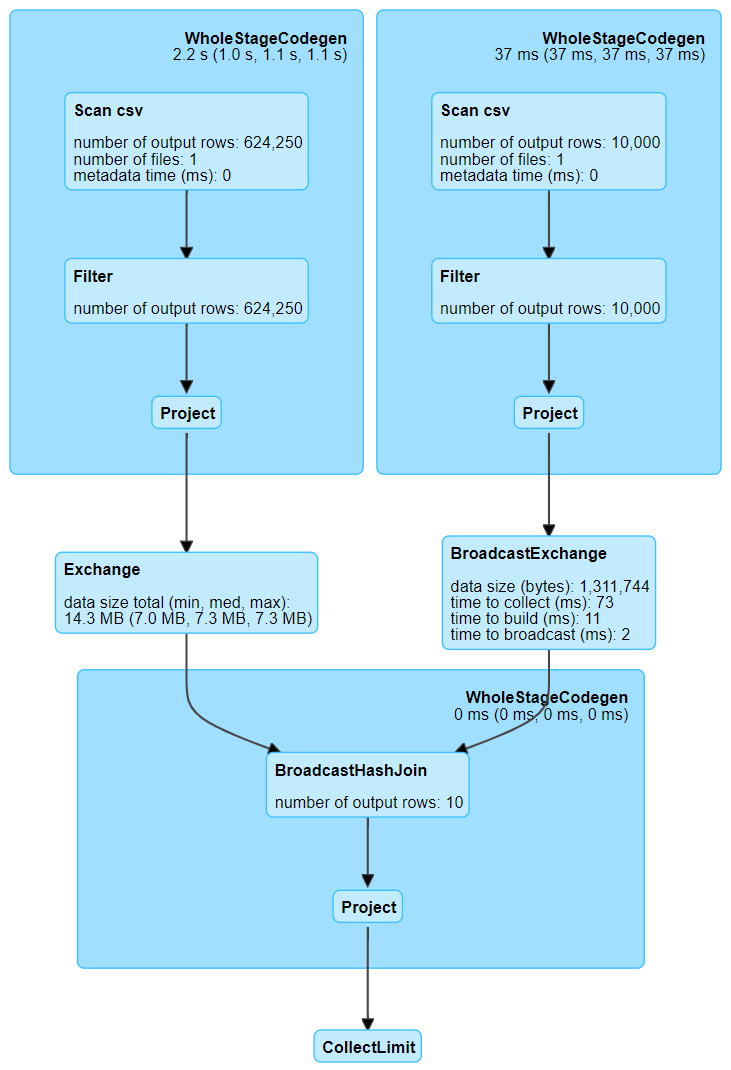

### Difference
- The graphical representation has the leaf nodes on the top and the root is at the bottom, while the textual tree is upside down.

### CollapseCodegenStages
- In the graphical representation of the physical plan, you can see that the operators are grouped into big blue rectangles. 
- These big rectangles correspond to codegen stages
- It is an optimization feature, which takes place in the phase of physical planning
- There is a rule called CollapseCodegenStages which is responsible for that and the idea is to take operators that support code generation and collapse it together to speed-up the execution by eliminating virtual function calls
- Not all operators support code generation, so some operators (for instance Exchange) are not part of the big rectangles
- In our example, there are few codegen stages that correspond to the big rectangles and in the plan output, you can see the id of the codegen stage in the brackets at the operator
- Also from the tree, you can tell if an operator supports the codegen or not because there is an asterisk with corresponding stage codegen id in the parenthesis if the codegen is supported.

### Scan CSV
- Represents reading the data
- From the detailed information, you can directly see what columns will be selected from the source
- We can also see here two types of filters: PartitionFilters and PushedFilters
- PartitionFilters
    - Applied on columns by which the datasource is partitioned in the file system.
    - These are very important because they allow for skipping the data that we don’t need
    - It is always good to check whether the filters are propagated here correctly
    - The idea behind this is to read as little data as possible since the I/O is expensive.
- PushedFilters
    - Filters on fields that can be pushed directly to files

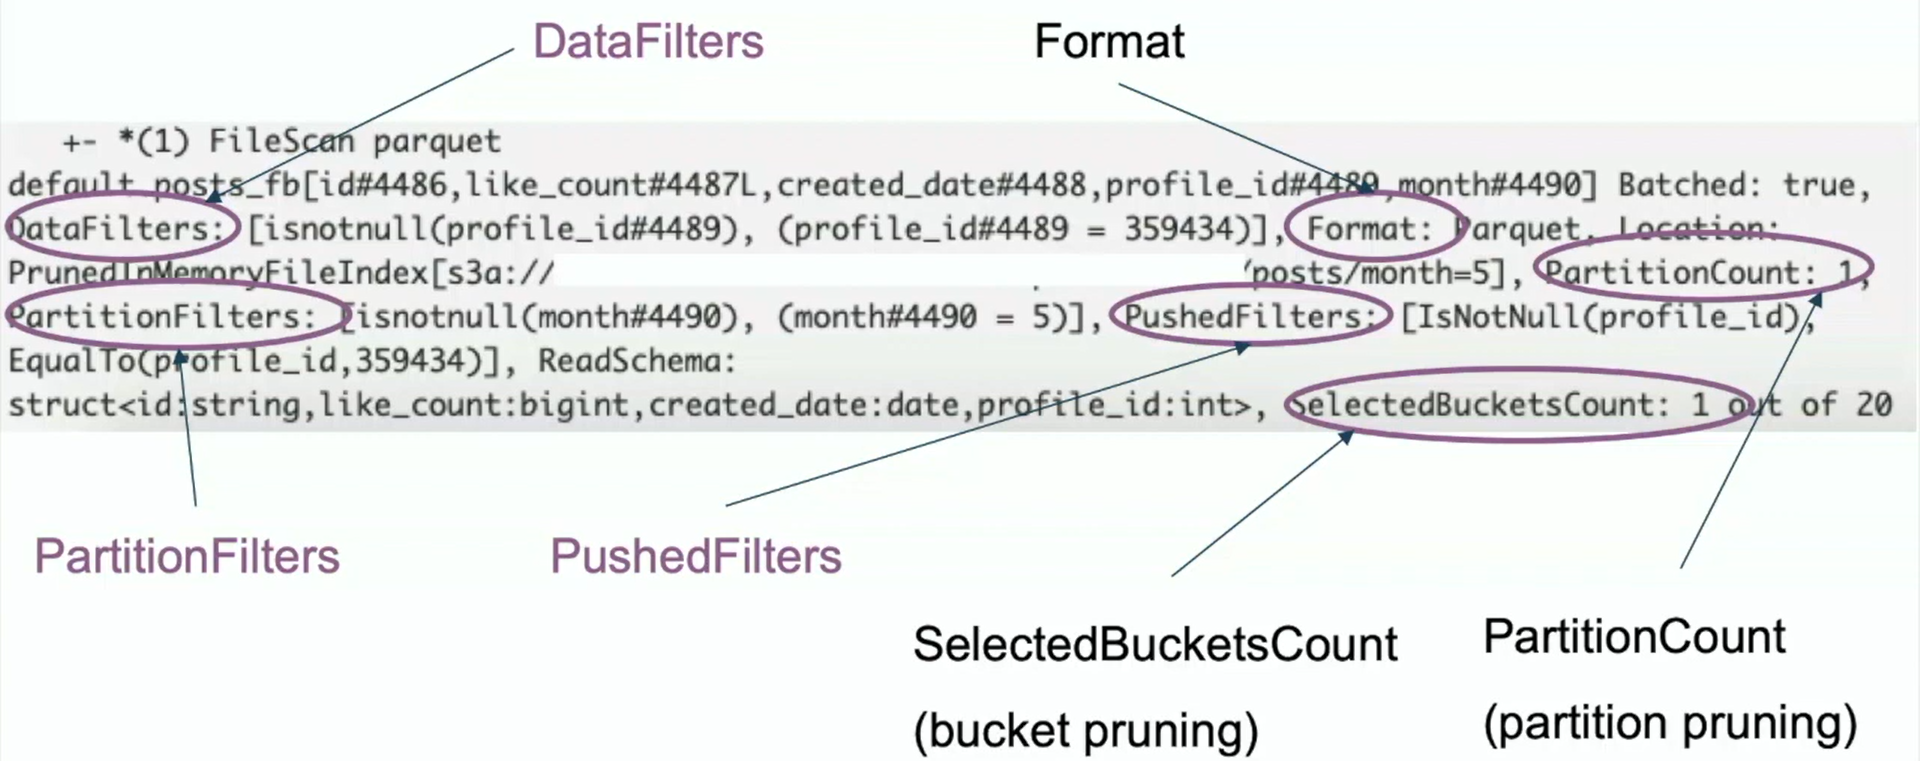

### Filter
- Represents the filtering condition
- Very often it doesn’t directly correspond to the filtering condition used in the query
- The reason for that is that all the filters are first processed by the Catalyst optimizer which may modify and relocate them. 
- There are several rules applied to the logical filters before they are converted to a physical operator
- Let’s list a couple of the rules here:
    - PushDownPredicates — Will push filters closer to the source.
    - CombineFilters — combines two neighboring operators into one
    - InferFiltersFromConstraints — this rule actually creates a new Filter operator for example from a join condition (from a simple inner join it will create a filter condition joining key is not null).
    - PruneFilters — removes redundant filters (for example if a filter always evaluates to True).

### Project
- This operator simply represents what columns will be projected (selected)
- Each time we call select, withColumn, or drop transformations on a DataFrame, Spark will add the Project operator to the logical plan which is then converted to its counterpart in the physical plan

### Exchange
- Represents shuffle, which is a physical data movement on the cluster
- Considered to be quite expensive because it moves the data over the network
- The information in the query plan contains also details about how the data will be repartitioned

- There are many types of partitioning:
    - RoundRobinPartitioning — with this partitioning the data will be distributed randomly into n approximately equally sized partitions, where n is specified by the user in the repartition(n) function
    - SinglePartition — with this partitioning all the data are moved to a single partition to a single executor
    - RangePartitioning — this partitioning is used when sorting the data, after calling orderBy or sort transformations.

In [27]:
df_Customer.columns

['CUSTOMERID',
 'CUST_CONSTTYPE_ID',
 'CUST_CATEGORYID',
 'PROFESSION',
 'AGE',
 'SEX',
 'MARITAL_STATUS',
 'QUALIFICATION',
 'NO_OF_DEPENDENT',
 'OCCUPATION',
 'POSITION',
 'GROSS_INCOME',
 'PRE_JOBYEARS',
 'NETTAKEHOMEINCOME',
 'BRANCH_PINCODE']

In [30]:
from pyspark.sql.functions import count

In [33]:
df_Customer.groupBy("POSITION").agg(count('NO_OF_DEPENDENT')).explain()

== Physical Plan ==
*(2) HashAggregate(keys=[POSITION#134], functions=[count(NO_OF_DEPENDENT#132)])
+- Exchange hashpartitioning(POSITION#134, 200)
   +- *(1) HashAggregate(keys=[POSITION#134], functions=[partial_count(NO_OF_DEPENDENT#132)])
      +- *(1) FileScan csv [NO_OF_DEPENDENT#132,POSITION#134] Batched: false, Format: CSV, Location: InMemoryFileIndex[file:/home/atingupta2005/data/Predict-Forclosure/Foreclosure-Prediction-Dataset..., PartitionFilters: [], PushedFilters: [], ReadSchema: struct<NO_OF_DEPENDENT:int,POSITION:string>


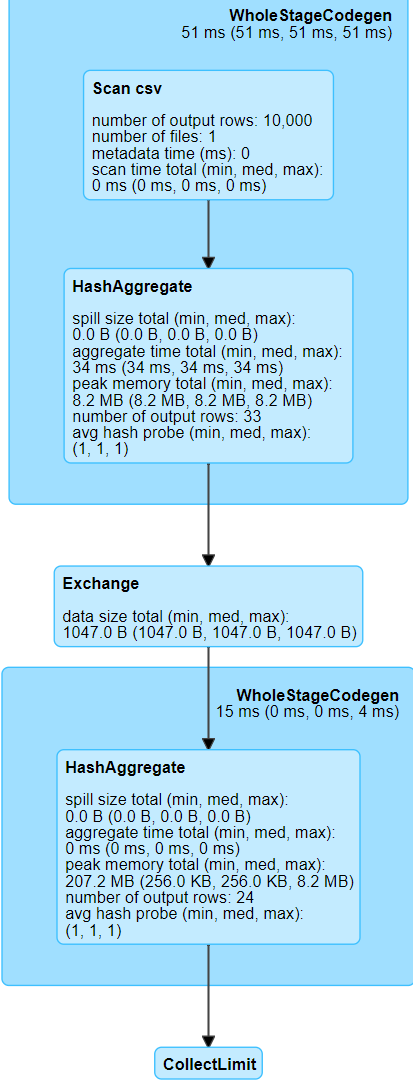

### HashAggregate
- Represents data aggregation
- It usually comes in pair of two operators which may or may not be divided by an Exchange
- The reason for having two HashAggregate operators is that the first one does a partial aggregation, which aggregates separately each partition on each executor

### BroadcastHashJoin & BroadcastExchange
- The BroadcastHashJoin (BHJ) is an operator that represents a specific joining algorithm
- Apart from this one, there are also other joining algorithms available in Spark such as SortMergeJoin or ShuffleHashJoin
- BHJ always comes in a pair with BroadcastExchange which is an operator that represents the broadcasted shuffle — the data will be collected to the driver and then send over to each executor where it will be available for the join.

### And how AQE (Adaptive Query Execution) interact with this stuff ???
- AQE is a new feature in Spark 3.0 which enables plan changes at runtime.
- It collects statistics during plan execution and if Spark detects better plan during execution, it changes them at runtime.
- If we put this on an update of the catalyst Optimizer schema, it will give something like that:


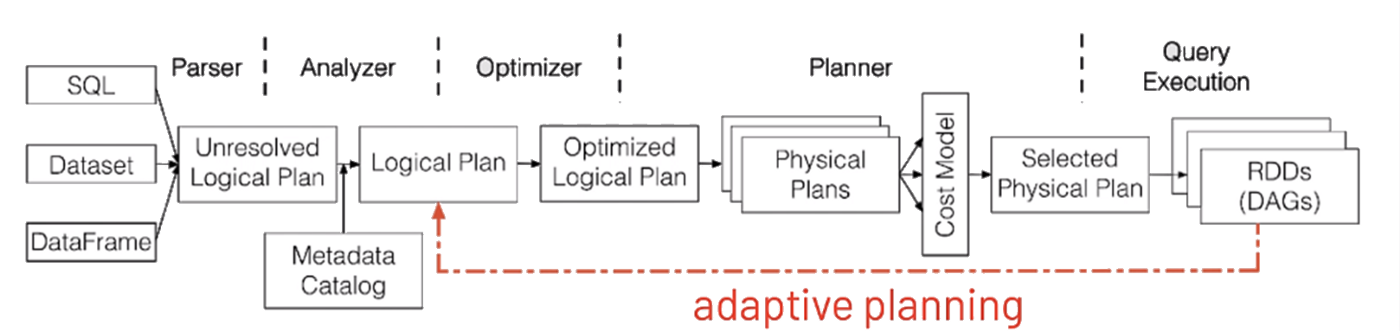

- However, any changes decided during DAG execution won’t be displayed after calling explain() function
- If you want to see these changes, you will have to explore Spark UI and tracking skew partitions splits, joins changes etc.
- For example, if you enable AQE (which is not enabled by default), explain call will produce a hint in the physical plan display:

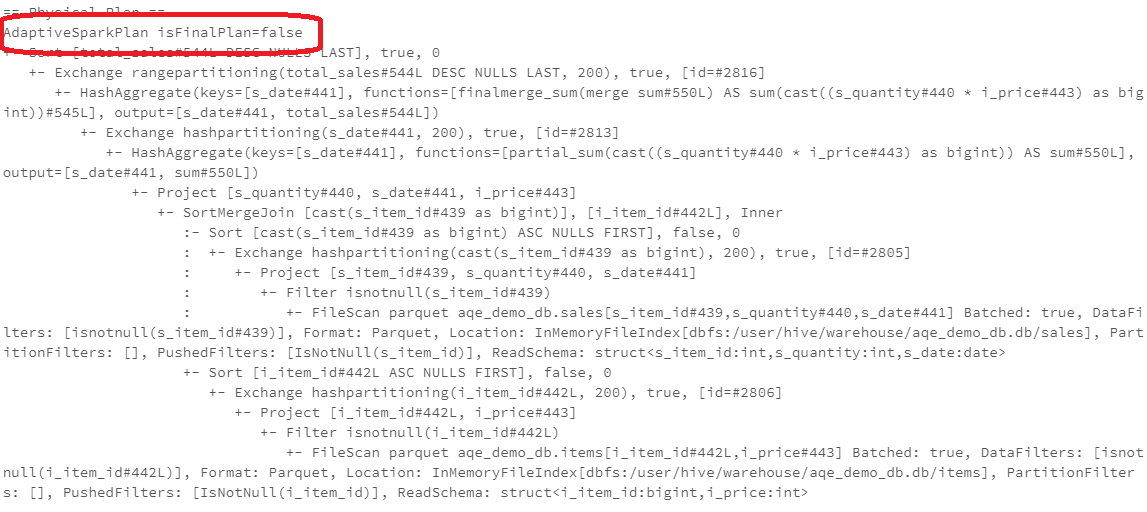

- In the explain output, you are hinted this physical plan is not the final plan, but if you have a look at the Spark UI, you will see that the SQL query plan is the final plan and optionally if the plan has been modified:

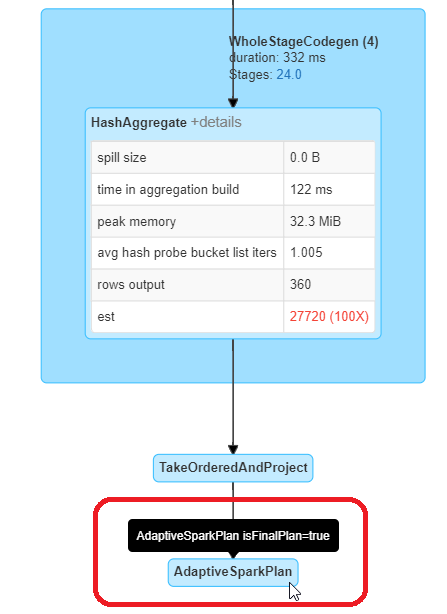

### Whole-Stage Java Code Generation (aka Whole-Stage CodeGen)
- A physical query optimization in Spark SQL that fuses multiple physical operators (as a subtree of plans that support code generation) together into a single Java function.
- Whole-Stage Java Code Generation improves the execution performance of a query by collapsing a query tree into a single optimized function that eliminates virtual function calls and leverages CPU registers for intermediate data.

### FileScanRDD
- FileScan represents reading the data from a file.
- It is  given FilePartitions that are custom RDD partitions with PartitionedFiles (file blocks)
- In our scenario, the CSV file is read

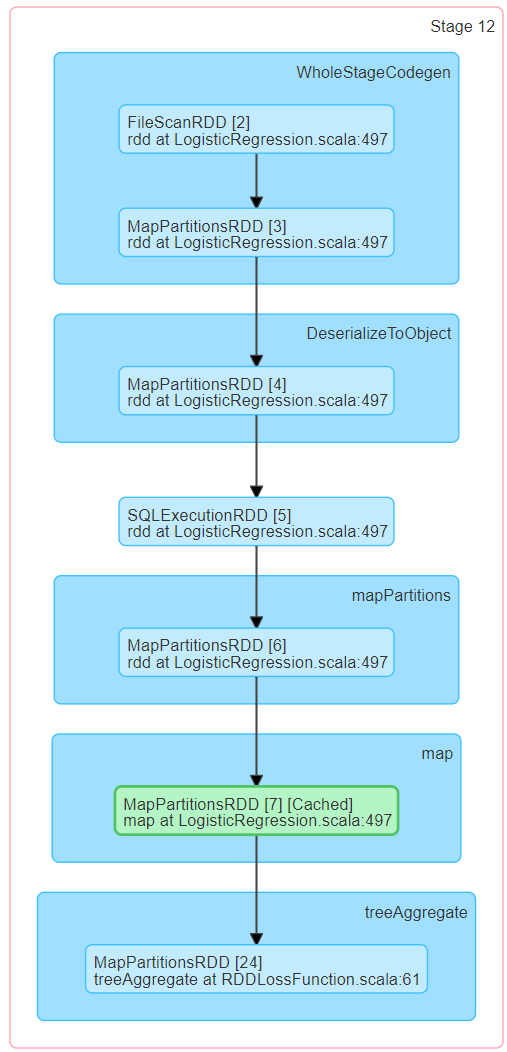

### MapPartitionsRDD
- Will be created when you use map Partition transformation
- Has exactly one-to-one narrow dependency
- MapPartitionsRDD is the result of the following transformations:
    - map
    - flatMap
    - filter

### SQLExecutionRDD
- Spark property that is used to track multiple Spark jobs that should all together constitute a single structured query execution. 

### DeserializeToObject:
- With the DataFrame API, a lot of operators work on InternalRow, the optimized representation of a row into memory
- But the MapPartitions operator works on a standard Scala object
- We need to use an operator, DeserializeToObject, to convert data from an InternalRow to a Dataframe object.

### SerializeFromObject
- This operator is used to go back to the DataFrame world.

### treeAggregate
- In case of treeAggregate imagine the follow n-ary tree that has all the partitions at its leaves and the root will contain the final reduced value

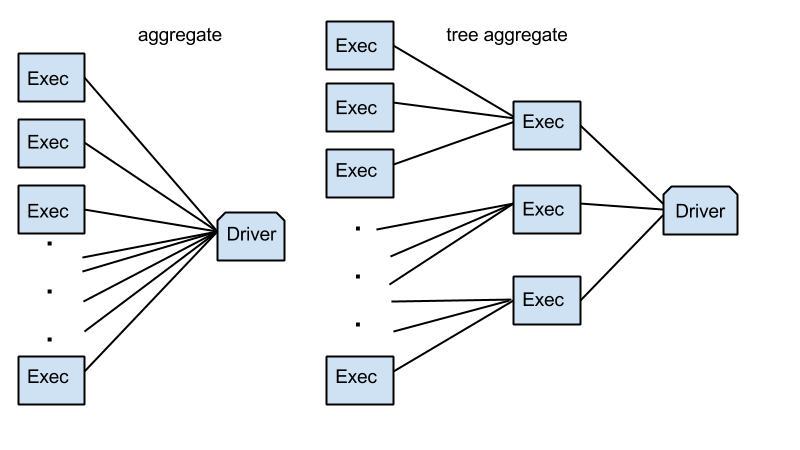